In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar  8 09:06:30 2023

@author: ML
"""

import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, metrics
import cv2
import matplotlib.pyplot as plt

In [ ]:
PIK = "/content/drive/MyDrive/pickle.dat"

with open(PIK, 'rb') as f:
  [X, x_min, x_max, y_min, y_max] = pickle.load(f)

img1 = X

X = np.array(X).astype('float32')
x_min = np.array(x_min).astype('float32')
x_max = np.array(x_max).astype('float32')
y_min = np.array(y_min).astype('float32')
y_max = np.array(y_max).astype('float32')

Xr = []
Y = []
for i in range(len(X)):
  Xr.append(cv2.resize(X[i], dsize=(100, 100)))
  Y.append([x_min[i], y_min[i], x_max[i], y_max[i]])

X = np.array(Xr) / 255
Y = np.array(Y) / 250

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

FileNotFoundError: ignored

In [ ]:
Y_test[100]

array([0.244, 0.264, 0.748, 0.768], dtype=float32)

In [ ]:
model = models.Sequential([
     layers.Convolution2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     layers.Convolution2D(64, (3, 3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     layers.Convolution2D(128, (3, 3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     layers.Convolution2D(128, (3, 3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     layers.Flatten(),
     layers.Dense(512, activation='relu'),
     layers.Dense(4, activation="linear")
])

model.summary()
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[metrics.MeanSquaredError()])

EPOCHS = 10
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT = 0.2
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [ ]:
Y_pred = model.predict(X_test)
Y_pred *= 250

34/34 [==============================] - 0s 7ms/step


In [ ]:
Y_pred

array([[ 59.05686 ,  64.88577 , 187.1154  , 188.08064 ],
       [ 68.16718 ,  62.227177, 183.84094 , 189.14105 ],
       [ 59.482174,  66.54958 , 179.69496 , 183.60995 ],
       ...,
       [ 72.58216 ,  62.56055 , 199.83806 , 192.85335 ],
       [ 70.31219 ,  66.86659 , 203.83327 , 203.39165 ],
       [ 59.357277,  65.919945, 175.78305 , 171.01096 ]], dtype=float32)

0.0


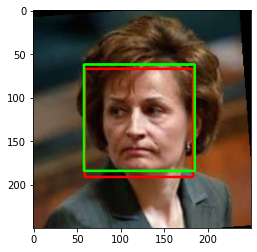

In [ ]:
n = 300
img = cv2.resize(img1[n], dsize=(250, 250))
img = cv2.rectangle(img, (int(x_min[n]), int(y_min[n])), (int(x_max[n]), int(y_max[n])), (255, 0, 0), 2)
img = cv2.rectangle(img, (int(Y_pred[n][0]), int(Y_pred[n][1])), (int(Y_pred[n][2]), int(Y_pred[n][3])), (0, 255, 0), 2)
plt.imshow(img)

#I = sqrt((x_max - x_min)*(y_max - y_min))
x1 = max(x_min[n],int(Y_pred[n][0]))
x2 = min(x_max[n], int(Y_pred[n][2]))
y1 = max(y_min[n],int(Y_pred[n][1]))
y2 = min(y_max[n], int(Y_pred[n][3]))
I = max((x2-x1) * (y2-y1), 0)
A1 = (x_max[n]-x_min[n]) * (y_max[n]-y_min[n])
A2 = (Y_pred[n][2]-Y_pred[n][0]) * (Y_pred[n][3]-Y_pred[n][1])
U = A1+A2-I
print(I/U)